<a href="https://colab.research.google.com/github/wenjie-hoo/baltic_ml/blob/main/baltic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from zipfile import ZipFile
from functools import reduce

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


In [2]:
!pip install -q gdown httpimport
!gdown 'https://github.com/wenjie-hoo/baltic_ml/raw/main/2022.11.07-merged-single-observation.zip'

Downloading...
From: https://github.com/wenjie-hoo/baltic_ml/raw/main/2022.11.07-merged-single-observation.zip
To: /home/robert/Desktop/baltic_ml/2022.11.07-merged-single-observation.zip
100%|████████████████████████████████████████| 329k/329k [00:00<00:00, 2.31MB/s]


In [3]:
zip_file = ZipFile('./2022.11.07-merged-single-observation.zip')
dfs = {text_file.filename: pd.read_csv(zip_file.open(text_file.filename))
       for text_file in zip_file.infolist()
       if text_file.filename.endswith('.csv') and not text_file.filename[37:].startswith('.')}

df_list=[]
for df in dfs.values():
       df['DATE'] = pd.to_datetime(df['DATE'],dayfirst = True)
       df_list.append(df)

df = reduce(lambda left,right: pd.merge(left.drop_duplicates(subset=['DATE','DEPTH']),right.drop_duplicates(subset=['DATE','DEPTH']),on=['DATE','DEPTH'],how='outer'), df_list)
# df.to_csv('xxxxx.csv')
df.head

<bound method NDFrame.head of            DATE  DEPTH  CHLORA  CTDSAL  CTDTMP  NH4  NO2  NO3    OXY  PH  \
0    1960-03-31    500     2.9    17.9     2.2  NaN  NaN  NaN  515.6 NaN   
1    1960-03-31   2600    26.5    20.0     1.5  NaN  NaN  NaN  396.9 NaN   
2    1960-03-31    100     2.8    17.8     2.2  NaN  NaN  NaN  421.9 NaN   
3    1960-03-31   2000     7.9    18.7     1.9  NaN  NaN  NaN  478.1 NaN   
4    1960-03-31   1500     6.6    18.5     2.1  NaN  NaN  NaN  471.9 NaN   
...         ...    ...     ...     ...     ...  ...  ...  ...    ...  ..   
4763 1960-03-02   1500     NaN    20.5     1.4  NaN  NaN  NaN  375.0 NaN   
4764 1960-03-02   2000     NaN    20.5     1.3  NaN  NaN  NaN  412.5 NaN   
4765 1960-03-02    100     NaN    20.4     1.6  NaN  NaN  NaN  356.3 NaN   
4766 1960-03-02   1000     NaN    20.4     1.5  NaN  NaN  NaN  462.5 NaN   
4767 1960-03-02    500     NaN    20.4     1.6  NaN  NaN  NaN  343.8 NaN   

       PO4  SECCHI  SIO2  TN    TP  
0     0.03     NaN  

<AxesSubplot:xlabel='DATE'>

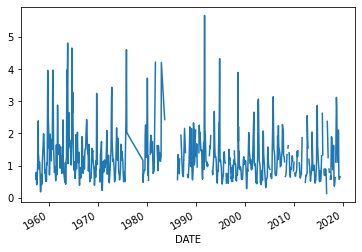

In [4]:
# df.describe()
df.groupby('DATE').mean()['TP'].plot()

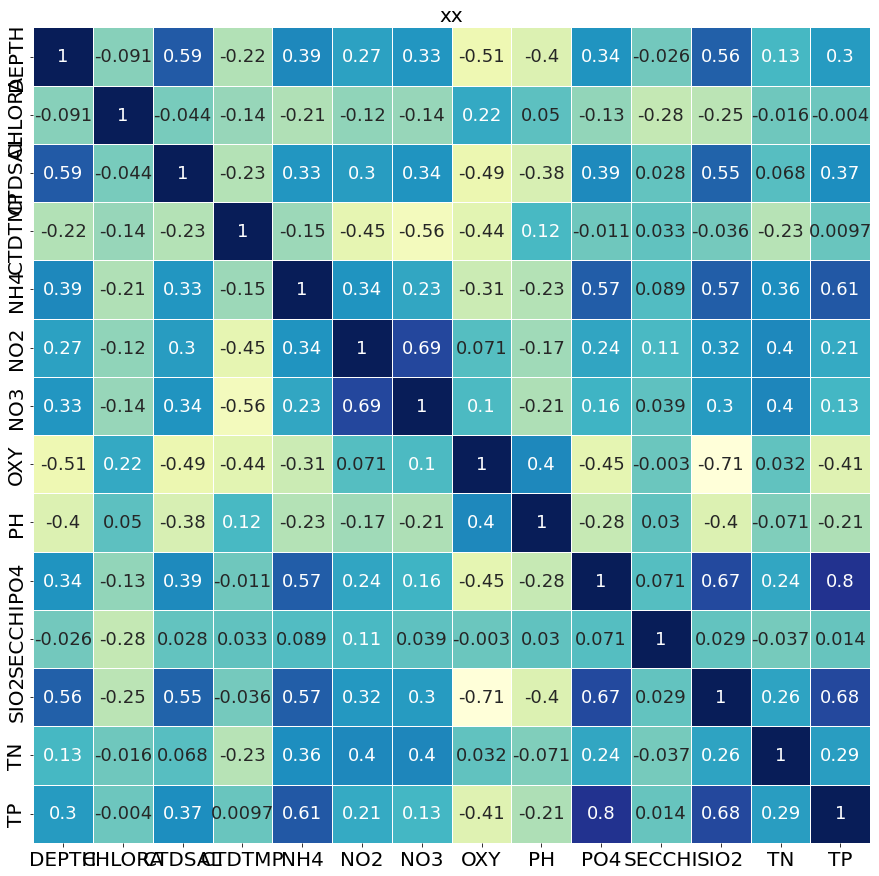

In [5]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),vmax=1, annot=True, linewidths=0.5, cbar=False, cmap='YlGnBu',annot_kws={'fontsize':18})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('xx',fontsize=20)
plt.show()

Text(0.5, 1.0, 'TP & PO4')

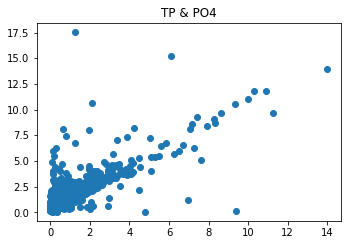

In [6]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.scatter(x=df['PO4'],y=df['TP'])
plt.title('TP & PO4')

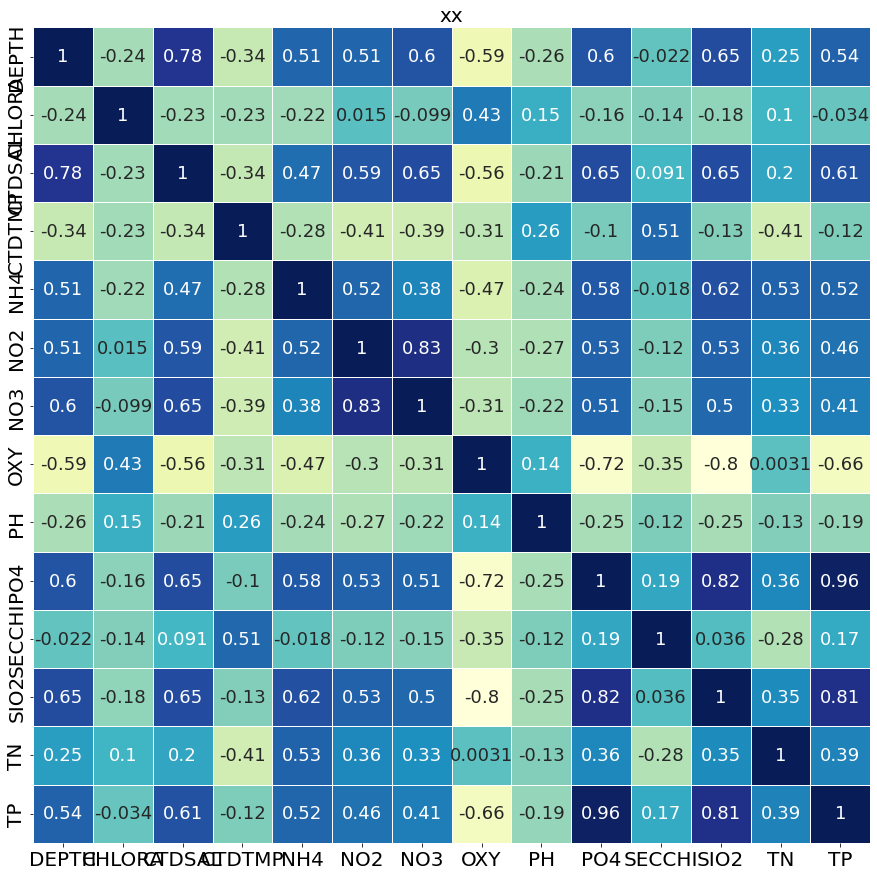

In [7]:
df.dropna(inplace=True)

fig = plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),vmax=1, annot=True, linewidths=0.5, cbar=False, cmap='YlGnBu',annot_kws={'fontsize':18})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('xx',fontsize=20)
plt.show()

Text(0.5, 1.0, 'TP & PO4')

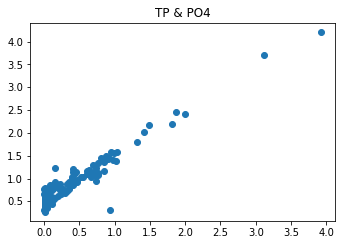

In [8]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.scatter(x=df['PO4'],y=df['TP'])
plt.title('TP & PO4')

In [9]:
df['TP'] = df['TP']
X = df.drop(['DATE'],axis=1)
y = df['PO4']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler(with_mean = True, with_std = True)
scaler.fit(x_train)
norm_X = scaler.transform(x_train)
norm_X_test = scaler.transform(x_test)

In [11]:
# linear regression
lg = LinearRegression()
lg.fit(norm_X, y_train)
y_pred = lg.predict(norm_X_test)
print(mean_squared_error(y_test,y_pred))

1.1539919448463116e-31


In [12]:
# neural netword
mlp = MLPRegressor(activation='logistic', hidden_layer_sizes=(2,2), solver='sgd', max_iter=3000)
mlp.fit(norm_X,y_train)
y_pred = mlp.predict(norm_X_test)
print(mean_squared_error(y_test, y_pred))

0.3864982301094708


In [13]:
# random forest 
rfr = RandomForestRegressor(random_state=0)
rfr.fit(norm_X, y_train)
y_pred = rfr.predict(norm_X_test)
print(mean_squared_error(y_test, y_pred))

0.015457192000000087


1 PO4 0.731574191991062
2 SIO2 0.10239859198097583
3 TP 0.08179635386921091
4 OXY 0.048119813018364314
5 SECCHI 0.010917719898014164
6 PH 0.007217316302229131
7 CHLORA 0.006585494335507413
8 CTDTMP 0.0032360514442429647
9 NO2 0.002036300148471233
10 CTDSAL 0.0019670389289775745
11 NO3 0.0017603145485383946
12 NH4 0.0014297544262031568
13 TN 0.0007781838176138103


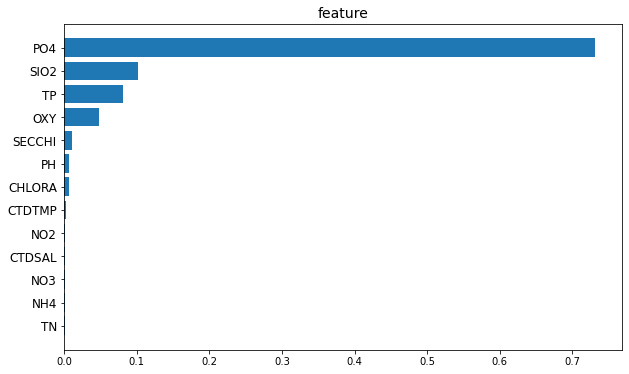

In [14]:
feat_lebels = x_train.columns[0:]
importances  = rfr.feature_importances_
indices = np.argsort(importances)[::-1]
index_list = []
value_list = []
for i,j in zip(range(x_train.shape[1]-1),indices):
    index_list.append(feat_lebels[j])
    value_list.append(importances[j])
    print(i+1, feat_lebels[j], importances[j])

plt.figure(figsize=(10,6))
plt.barh(index_list[::-1],value_list[::-1])
plt.yticks(fontsize = 12)
plt.title('feature',fontsize = 14)
plt.show()


In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators':[150,200,300],
    'min_samples_split':[2,3,5],
    'min_samples_leaf':[1,2,3]
}
grid_seach_rf= GridSearchCV(estimator=RandomForestRegressor(random_state=0),param_grid=param_grid, scoring='neg_mean_squared_error', cv = 5)
grid_seach_rf.fit(norm_X, y_train)
print(grid_seach_rf.best_params_)


{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [20]:
rfr_ = RandomForestRegressor(n_estimators=150, min_samples_leaf=1, min_samples_split=2, random_state=0)
rfr_.fit(norm_X, y_train)
y_pred = rfr_.predict(norm_X_test)
print(mean_squared_error(y_test, y_pred))

0.012635920533333244


In [21]:
print(y_pred.size)
print(y_test.size)

25
25


In [22]:
pd.DataFrame(y_pred[:10],y_test[:10])

,0
PO4,
0.08,0.079333
0.00,0.003467
0.04,0.041867
3.11,2.743733
0.03,0.031667
0.17,0.159267
0.06,0.058067
0.74,0.727933
0.67,0.689267


## SOME INFO ON BALTIC SEA AND WHAT TO LOOK AT

Dissolved oxygen  OXY

Phosphate PO4

Total phosphorus TP

Nitrite NO2

Nitrate NO3

Ammonia NH4

Total nitrogen TN

Silicate SIO2

Chlorophyll a CHLORA

Total Alkalinity TA

Dissolved Inorganic Carbon (DIC) PH

Trace elements (Cd, Co, Cu, Fe,  Ni,  Pb, Zn) ( pierwiastki sladowe ) (CHYBA niewazne)
Elements such as iron or zinc, are critical to marine life and play a key role in regulating the global carbon cycle

SECCHI -
used to measure water transparency or turbidity in bodies of water. The disc is mounted on a pole or line, and lowered slowly down in the water


Salinity: The amount (mass or quantity of matter) of salt per amount (volume or mass) of a body of water.
CTDSAL

Temperature
CTDTMP  (i think?)

In [372]:
## Some helpful filters

def fix_date_formatting(df):
    df['DATE'] = pd.to_datetime(df.DATE, infer_datetime_format=True)
    return df

def filter_by_months(df, months):
    return df[df['DATE'].dt.month == any(months)]

def group_by_year(df, par):
    df =  df.groupby(df['DATE'].dt.year)[par].mean()
    return pd.DataFrame({"DATE":df.index, par:df.values})
    
def filter_by_depth(df, depth):
    df = df.loc[df['DEPTH'] == depth]
    return df

In [420]:
BASE = './2022.11.07-merged-single-observation/'

ctdtmp = pd.read_csv(BASE + 'CTDTMP.csv')
ctdtmp = fix_date_formatting(ctdtmp)

ctdsal = pd.read_csv(BASE + 'CTDSAL.csv')
ctdsal = fix_date_formatting(ctdsal)

oxygen = pd.read_csv(BASE + 'OXY.csv')
oxygen = fix_date_formatting(oxygen)

tn = pd.read_csv(BASE + 'TN.csv')
tn = fix_date_formatting(tn)



## Some theory water exchange

Baltic sea is  not very salty naturally 7-8 promile, mediterranean sea has 39 for comparaison. And it's saltiness levels are dependent on water exchange with global ocean by north sea. which in the case of the Baltic Sea is difficult due to narrow and tight connections (Danish straits)

water exchange is super important becouse water from north sea is much saltier, colder and better oxygenated. Those exchanged are happening less and less often. Around 5-7 infusions per 10 years in 70-80's. While only two were observed sice 2000's. Furthermore every day sweet waters from more than 200 rivers are injected into the baltic sea. Which combined can turn baltic sea into freshwater tank.

Continuing on water exchange. Less often they occur, higher the temperature should lead to higher mean temperature which is one of things that promotes the growth of microorganisms and algae


In [412]:
ctdtmp['DEPTH'].unique()

array([1000,  500, 2000, 1500, 2600,  100, 2500, 2200, 1800, 2300, 1300,
        800, 1700,  400, 1900, 1400, 2100,  900,  700, 1100,  200, 1200,
       2400, 2700, 2800, 2900,  300, 3500,  509, 1510,  110, 1010,    0,
       2750, 2640, 1450])

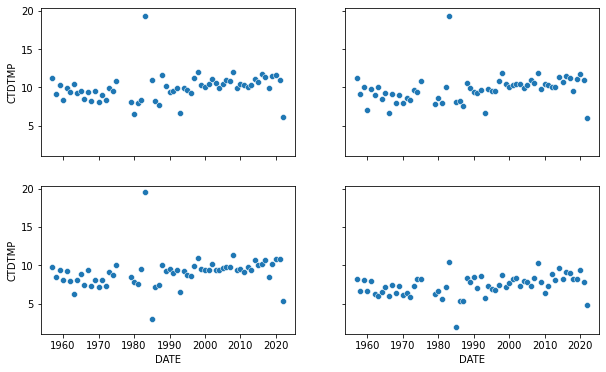

In [419]:
##TODO plot temperature to check if true best if using mean by season
#plot_depth(salinity,'CTDSAL', [4,5,6], 100)
df1 = filter_by_depth(ctdtmp, 100)
df1 = group_by_year(df1, 'CTDTMP')

df2 = filter_by_depth(ctdtmp, 500)
df2 = group_by_year(df2, 'CTDTMP')

df3 = filter_by_depth(ctdtmp, 1000)
df3 = group_by_year(df3, 'CTDTMP')

df4 = filter_by_depth(ctdtmp, 2000)
df4 = group_by_year(df4, 'CTDTMP')

#df = filter_by_months(df, [12])

#plt.ylim(5, 14)
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(10,6))
ax1, ax2, ax3, ax4 = axes.flatten()
sns.scatterplot(data=df1, x="DATE", y='CTDTMP', ax = ax1)
sns.scatterplot(data=df2, x="DATE", y='CTDTMP', ax = ax2)
sns.scatterplot(data=df3, x="DATE", y='CTDTMP', ax = ax3)
sns.scatterplot(data=df4, x="DATE", y='CTDTMP', ax = ax4)
#plt.ylim(5,15)
plt.show()


## Industrial and agricultural activities

Industrial and agricultural activities aruond baltic sea 
causes the associated nutrient loads to end up in marine waters. Intensive agricultural production requires the use of fertilizers, in addition, farmers produce tons of organic waste, meat plants where thousands of pigs are raised using the mulchless method produce hectoliters of manure with a high content of minerals, especially..
### nitrates!




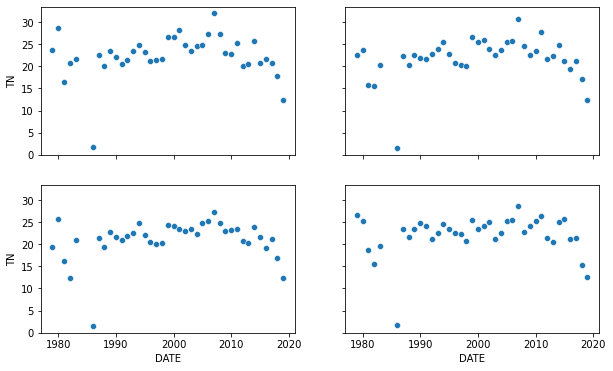

In [422]:
# TODO plot and analyse nitrates
df1 = filter_by_depth(tn, 100)
df1 = group_by_year(df1, 'TN')

df2 = filter_by_depth(tn, 500)
df2 = group_by_year(df2, 'TN')

df3 = filter_by_depth(tn, 1000)
df3 = group_by_year(df3, 'TN')

df4 = filter_by_depth(tn, 2000)
df4 = group_by_year(df4, 'TN')

#df = filter_by_months(df, [12])

#plt.ylim(5, 14)
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(10,6))
ax1, ax2, ax3, ax4 = axes.flatten()
sns.scatterplot(data=df1, x="DATE", y='TN', ax = ax1)
sns.scatterplot(data=df2, x="DATE", y='TN', ax = ax2)
sns.scatterplot(data=df3, x="DATE", y='TN', ax = ax3)
sns.scatterplot(data=df4, x="DATE", y='TN', ax = ax4)
#plt.ylim(5,15)
plt.show()

leading to overfertilization and algae blooms.
After war farmers began to use heavy laods of fertilizers causing in better growth of plants. No one was predicting that huge amounts of fertilizers will seep into the groundwater from there to the rivers and then to the sea.

And because as we said previously, baltic is badly communcated with global ocean it cleans up slowly

Causes of that are heavy growth of algae and cyanobacteria. 

The worst situation is from July to September, when cyanobateria called cyanobacteria bloom, poisoning the fish and cutting off the light to plants growing on the bottom.

In [ ]:
## TODO plot chlora levels, plot disk, visiblity etc.

## OXYGEN

### Continuing on problems we explained 

(in general)  Dissolved oxygen comes from air and partialy from photosynthesis 
(this is a general theory because the one in the baltic, as has already been said, should also be injected from the northern sea)

Increased eutrophication and climate change as a result of human economic activities contribute to the formation of dead zones. Where 
### Oxygen
is lacking encapsulated phosphorus is released from bottom sediments and further increases the concentration of nutrients

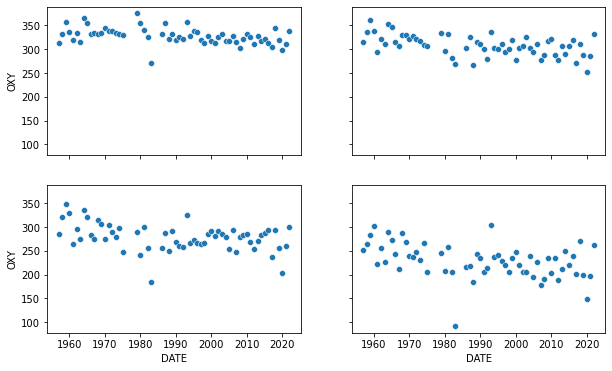

In [432]:
## plot oxygen, plot phoshorus levels and micronutrients
# TODO plot and analyse nitrates
df1 = filter_by_depth(oxygen, 100)
df1 = group_by_year(df1, 'OXY')

df2 = filter_by_depth(oxygen, 1000)
df2 = group_by_year(df2, 'OXY')

df3 = filter_by_depth(oxygen, 1500)
df3 = group_by_year(df3, 'OXY')

df4 = filter_by_depth(oxygen, 2000)
df4 = group_by_year(df4, 'OXY')

#df = filter_by_months(df, [12])

#plt.ylim(5, 14)
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(10,6))
ax1, ax2, ax3, ax4 = axes.flatten()
sns.scatterplot(data=df1, x="DATE", y='OXY', ax = ax1)
sns.scatterplot(data=df2, x="DATE", y='OXY', ax = ax2)
sns.scatterplot(data=df3, x="DATE", y='OXY', ax = ax3)
sns.scatterplot(data=df4, x="DATE", y='OXY', ax = ax4)
#plt.ylim(5,15)
plt.show()

As their amount grow and the water heats up, the algae develops faster and the water blooms more intensively.

### Further info on chlora and oxygen

Oxygen is used to decompose organic matter that settles to the bottom. Lacking oxygen which should be delivered by north sea there is no regeneration process. 

Oxygen is also essential for marine organisms. At least 6 mg/l dissolved oxygen is needed for life. On the surface of the open Baltic Sea it is about 11 mg/l, but it is worse at the bottom, where hypoxia is recorded as low as 2 mg/l.

In [ ]:
## TODO Check oxygen lelvels by depth

Degradation began at the beginning of the 20th century, even a hundred years ago there were zones with reduced oxygen content, but in the last century they appeared 12 times more.

furthermore 
### phytoplankton

whose development is fostered by the above-mentioned agricultural processes leads to the formation of large amounts of plant debris falling to the bottom there itself feeding microorganisms that take oxygen away from fish and other animals. When the resources are used up, anaerobic bacteria appear, causing rotting processes and emitting poisonous hydrogen sulfide, which turns the water at the bottom into stinking mud.


## Some general rants i found, could be good idea for provocating tittle of presentation or something

### Are there any chances for recovery?

Not likely. Although now farmers use 10 times less fertilizers than centuries ago, even if they stopped using them completely, it would not help, because the current fertilizers will continue to decompose for the next 30-40 years. The only hope is inflows from the North Sea, which, as we have already said, are becoming increasingly rare.

Side note 
Another problem you hear about are the tons of sunken munitions and chemical weapons left over from the 2nd Swastika War (about 50,000 tons) including sulfur mustard. Fortunately, they are in the form of a very poorly water-soluble thick slurry, so left alone they do not pose much of a threat.

##### some references ( which are citing other references :)
https://www.teraz-srodowisko.pl/aktualnosci/Baltyk-eutrofizacja-morski-ekosystem-rolnictwo-scieki-11653.html
https://www.newsweek.pl/zdrowie-i-nauka/nauka/morze-baltyckie-zmienia-sie-w-zielone-pelne-szlamu-bajoro/6fews3b
https://ekoagora.pl/wp-content/uploads/2021/05/PL-APC-40-3.pdf